## Udemy Courses dataset

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('udemy_courses.csv', parse_dates=['published_timestamp'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

### 1. Display Top 10 Rows of the Dataset

In [82]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


### 2. Display Last 5 Rows of the Dataset

In [13]:
data.tail()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28 19:51:11+00:00,Web Development


### 3. Check Null Values in the Dataset

In [21]:
print('Any missing values?', data.isnull().values.any())

Any missing values? False


<AxesSubplot:>

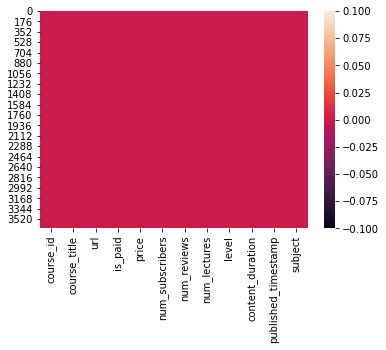

In [22]:
sns.heatmap(data.isnull())

### 4. Check for Duplicate Data & Drop Them

In [26]:
dup = data.duplicated().any()
print('Are there any deplicated value?', dup)

Are there any deplicated value? True


In [27]:
data = data.drop_duplicates()

In [28]:
dup = data.duplicated().any()
print('Are there any deplicated value?', dup)

Are there any deplicated value? False


### 5. Number of Courses per Subject

In [30]:
data['subject'].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


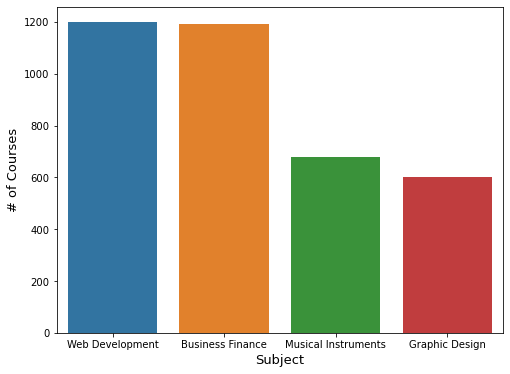

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(data['subject'],order = data['subject'].value_counts().index)
plt.xlabel('Subject', fontsize=13)
plt.ylabel('# of Courses', fontsize=13)
# plt.xticks(rotation = 60)
plt.show()

### 6. Level of Courses

In [43]:
data['level'].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


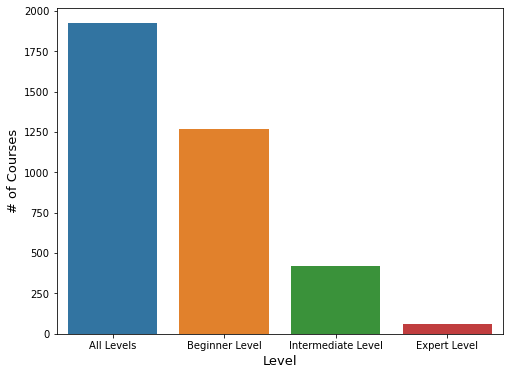

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(data['level'], order=['All Levels', 'Beginner Level', 'Intermediate Level','Expert Level'])
plt.xlabel('Level', fontsize=13)
plt.ylabel('# of Courses', fontsize=13)
# plt.xticks(rotation = 60)
plt.show()

### 7. Paid & Free Courses

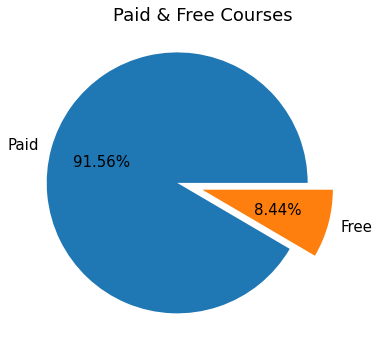

In [81]:
plt.figure(figsize=(8, 6))
myexplode = [0.2, 0]
plt.pie(data['is_paid'].value_counts(), labels = ['Paid', 'Free'], explode = myexplode,textprops={"fontsize":15}, autopct = "%0.2f%%")
plt.title("Paid & Free Courses", loc = 'center',fontsize=18)
plt.show()

### 8. Paid Courses have More Lectures or Free Ones?

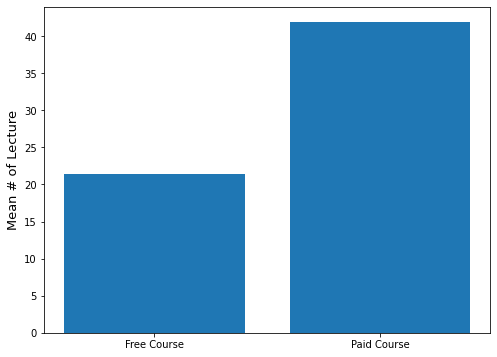

In [127]:
plt.figure(figsize=(8, 6))
data_lecture = data.groupby(['is_paid'])['num_lectures'].mean()
plt.bar(['Free Course','Paid Course'], data_lecture)
plt.ylabel('Mean # of Lecture', fontsize=13)
plt.show()

### 9. Paid Courses have More Subscribers or Free Ones?

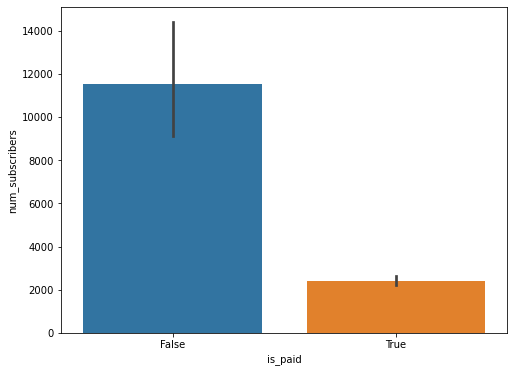

In [129]:
plt.figure(figsize=(8, 6))
sns.barplot(x='is_paid', y='num_subscribers', data = data)
plt.show()

### 10. Which Level of Courses have highest Number of Subscribers?

In [130]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

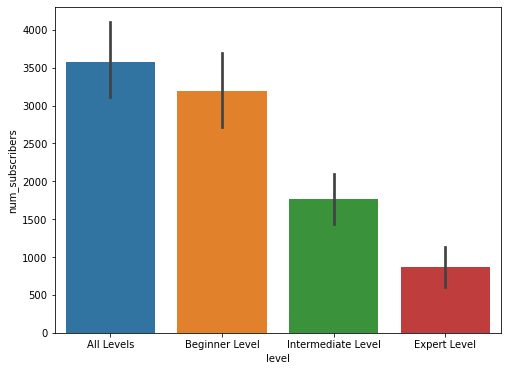

In [132]:
plt.figure(figsize=(8, 6))
sns.barplot(x='level', y='num_subscribers', data = data,  order=['All Levels', 'Beginner Level', 'Intermediate Level','Expert Level'])
plt.show()

### 11. Most Popular Course

In [135]:
data[data['num_subscribers'].max() == data['num_subscribers']]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

### 12. Display 10 Most Popular Courses as Per Number of Subscribers

In [138]:
top_10 = data.sort_values(by = 'num_subscribers', ascending = False).head(10)

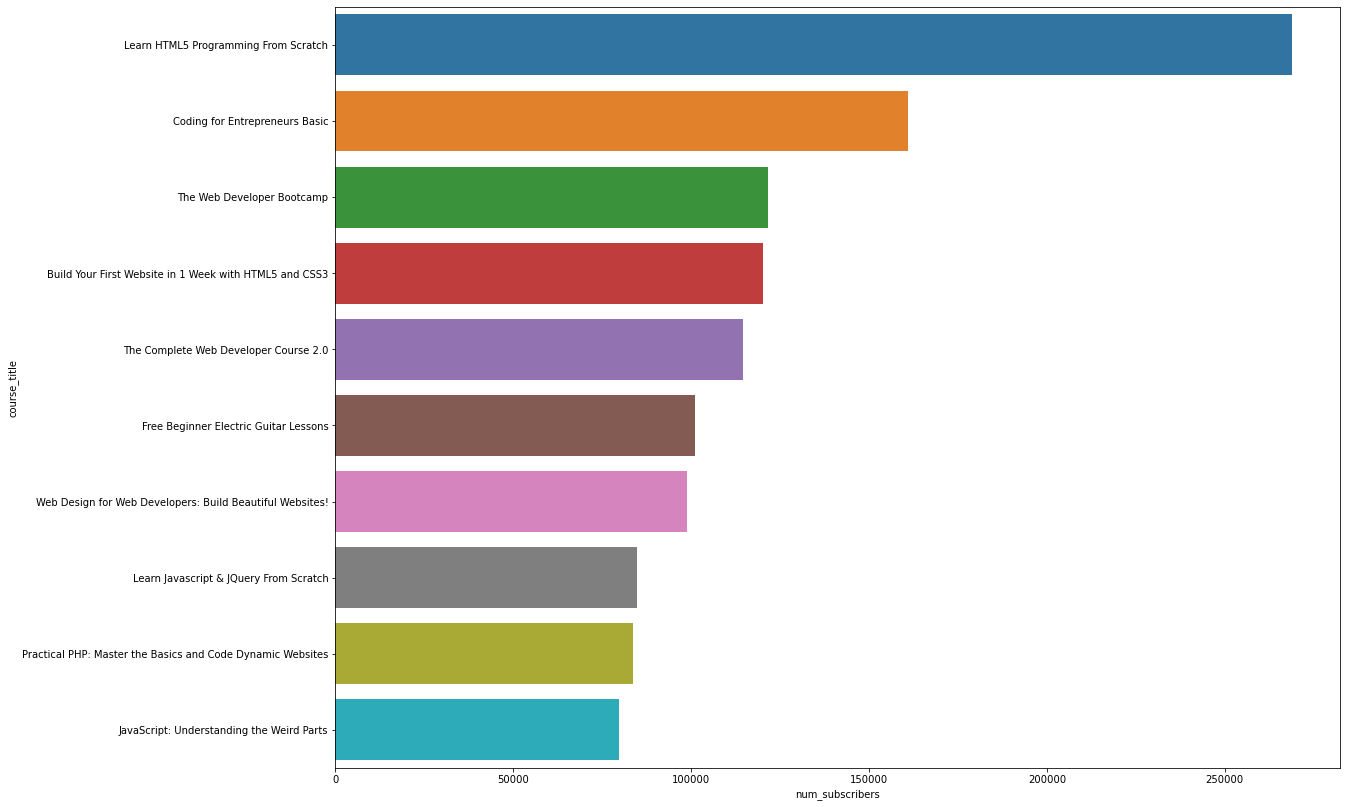

In [154]:
plt.figure(figsize=(18, 14))
sns.barplot(y = 'course_title', x = 'num_subscribers', data = top_10)
plt.show()

### 13. Courses with the Highest Number of Reviews

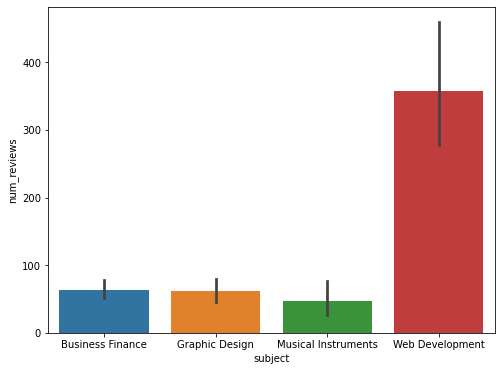

In [157]:
plt.figure(figsize=(8, 6))
sns.barplot(x = 'subject', y = 'num_reviews', data = data)
plt.show()

### 14. Does Price Affect Number of Reviews?

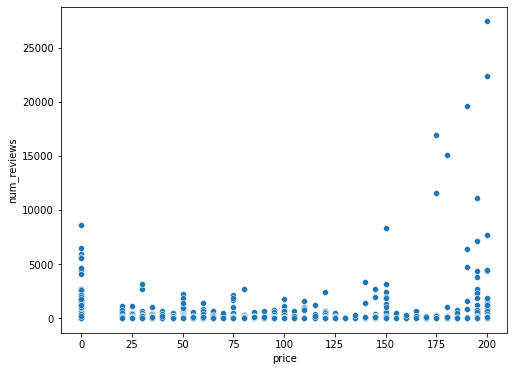

In [160]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'price', y = 'num_reviews', data = data)
plt.show()

### 15. Total Number of Courses Related to Python

In [166]:
pythonCourses = len(data[data['course_title'].str.contains('python', case = False)])
print('Total Number of Courses Related to Python:', pythonCourses)

Total Number of Courses Related to Python: 29


In [171]:
python = data[data['course_title'].str.contains('python', case = False)].sort_values(by = 'num_subscribers', ascending = False).head(10)

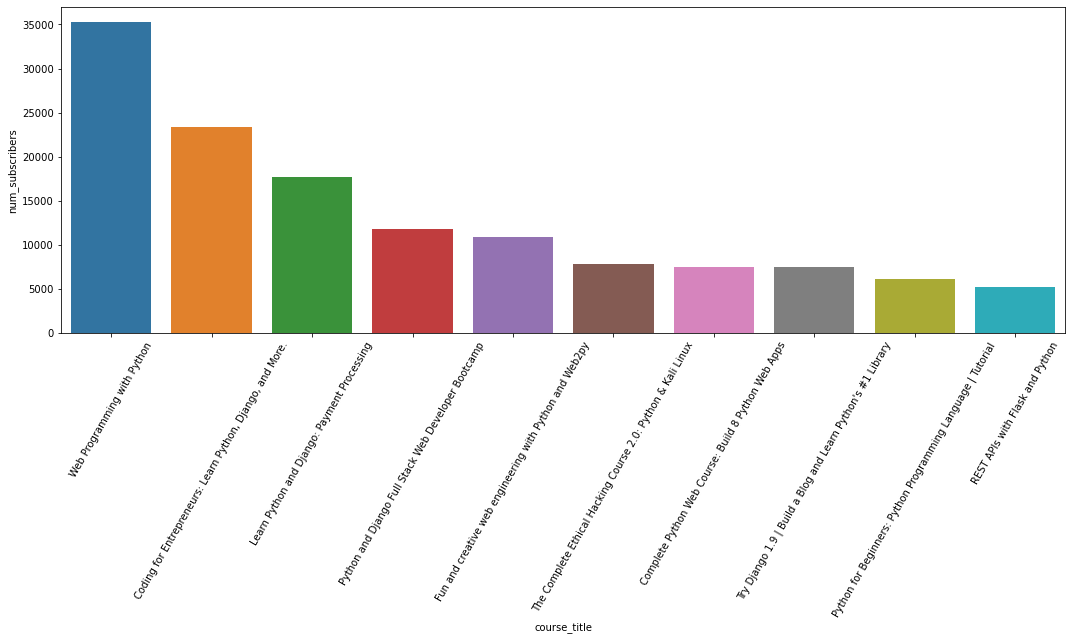

In [174]:
plt.figure(figsize=(18, 6))
sns.barplot(x = 'course_title', y = 'num_subscribers', data = python)
plt.xticks(rotation = 60)
plt.show()

### 16. In Which Year, the Highest Number of Courses were Posted?

In [175]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [179]:
data['published_year'] = data['published_timestamp'].dt.year

<AxesSubplot:xlabel='published_year', ylabel='count'>

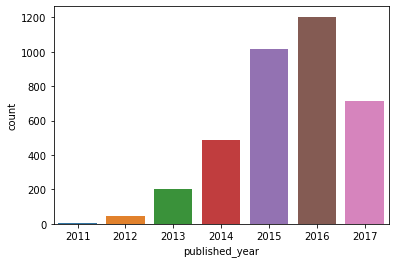

In [181]:
sns.countplot('published_year',data=data)

### 17. Category-Wise Count of Posted Subjects [Year-Wise]

In [187]:
subjects = data.groupby('published_year')['subject'].value_counts()
subjects

published_year  subject            
2011            Web Development          5
2012            Web Development         19
                Graphic Design          10
                Musical Instruments     10
                Business Finance         6
2013            Business Finance        84
                Web Development         55
                Musical Instruments     39
                Graphic Design          23
2014            Business Finance       192
                Musical Instruments    120
                Web Development        113
                Graphic Design          65
2015            Business Finance       339
                Web Development        336
                Musical Instruments    171
                Graphic Design         168
2016            Web Development        448
                Business Finance       347
                Musical Instruments    228
                Graphic Design         181
2017            Business Finance       223
                We

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


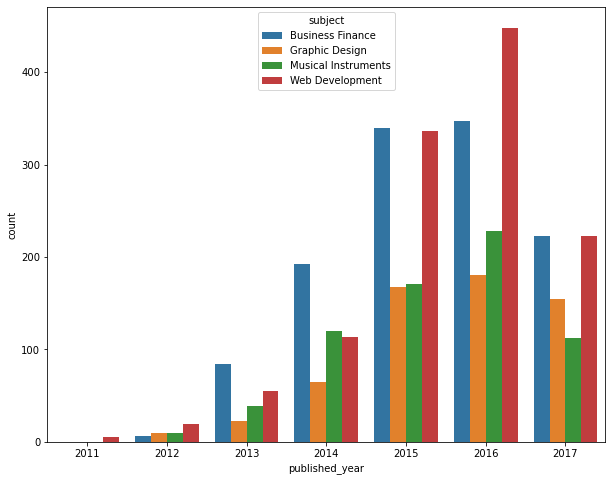

In [192]:
plt.figure(figsize=(10, 8))
sns.countplot('published_year', hue = 'subject', data = data)
plt.show()